In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', header=0,
    sep=',', parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')
    


In [ ]:
df.show()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
def prepareData(df):
    df['Request_Closing_Time'] = ((df['Closed Date'] - df['Created Date']).dt.seconds/60)/60
    df_clean=df[df['Request_Closing_Time'].notnull()]
    df_perfect = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
    return df_perfect


In [ ]:
df_perfect=prepareData(df)
df_perfect

<AxesSubplot:title={'center':'Most Common Complaints'}>

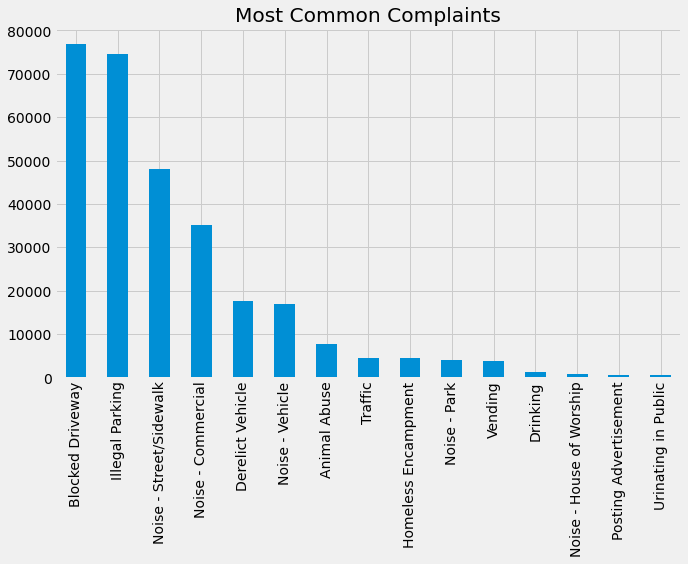

In [32]:
(df_perfect['Complaint Type'].value_counts()).head(15).plot(kind='bar',figsize=(10,6),title="Most Common Complaints")

<AxesSubplot:title={'center':'Least Complaints'}>

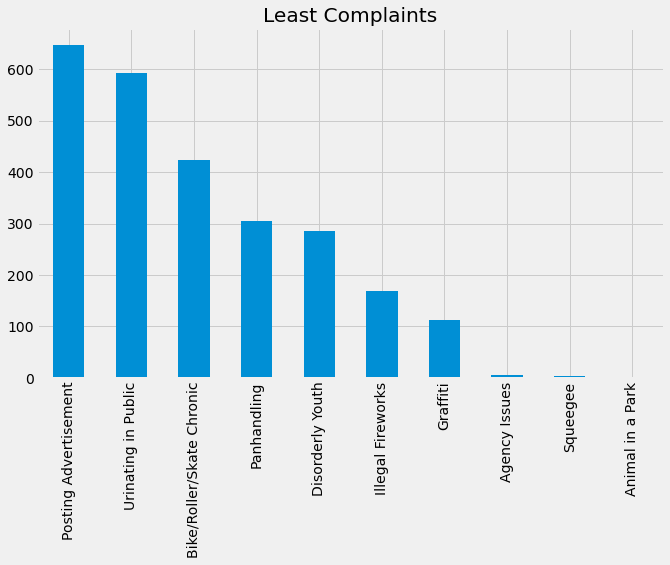

In [33]:
(df_perfect['Complaint Type'].value_counts()).tail(10).plot(kind='bar',figsize=(10,6),title="Least Complaints")

<AxesSubplot:ylabel='Borough'>

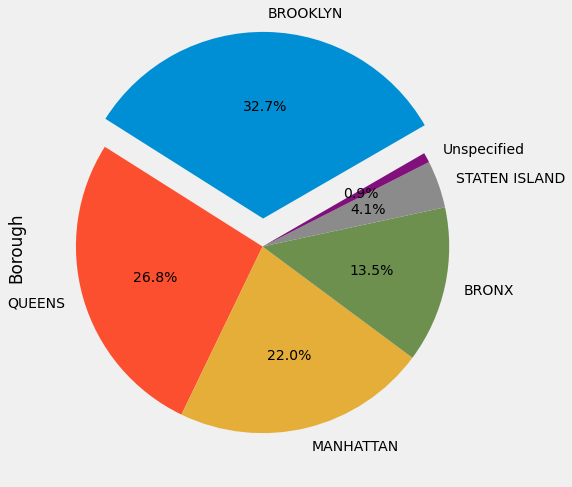

In [34]:
df['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.15,0,0,0,0,0),startangle=30,figsize=(10,8))

<AxesSubplot:title={'center':'Average Response time of Complain'}, xlabel='Complaint_Type', ylabel='Average Response Time'>

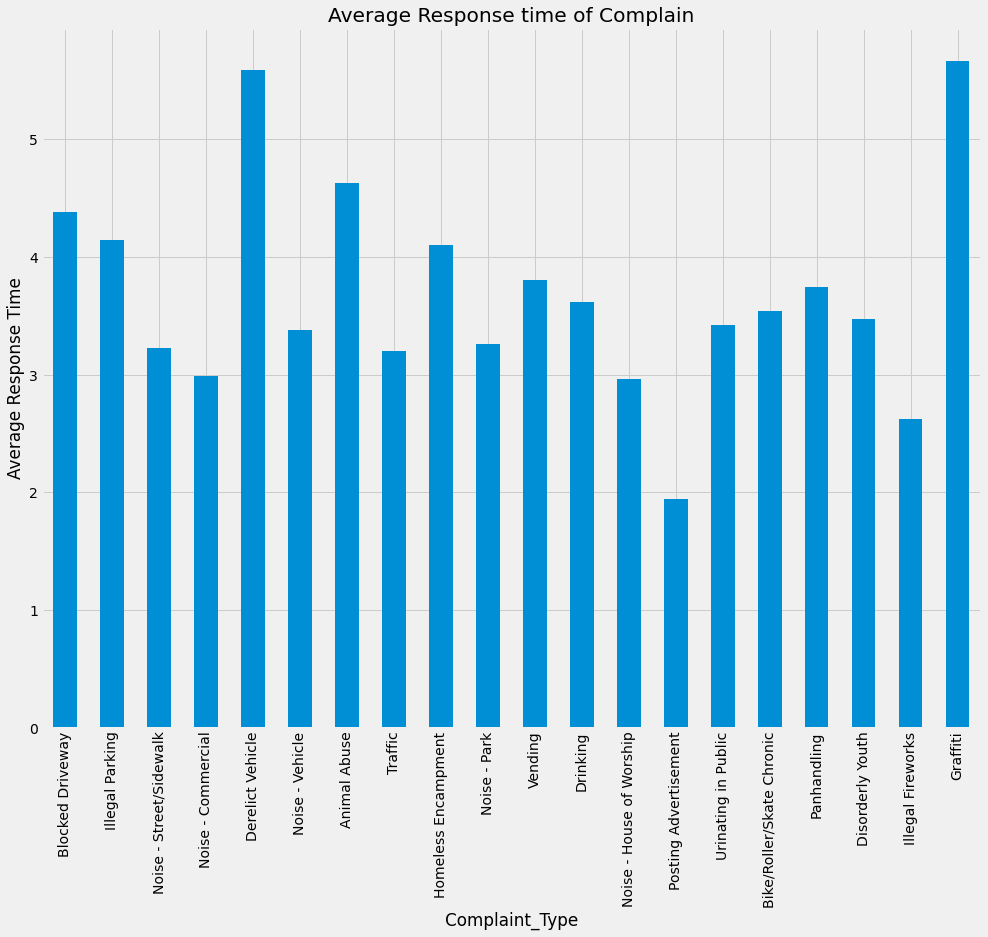

In [35]:
var = df_perfect.groupby('Complaint Type').Request_Closing_Time.mean()
frequent = df_perfect['Complaint Type'].value_counts()
var = var.loc[frequent.index]
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Average Response time of Complain")
var.head(20).plot(kind='bar')

<AxesSubplot:title={'center':'Location type Vs Complain'}>

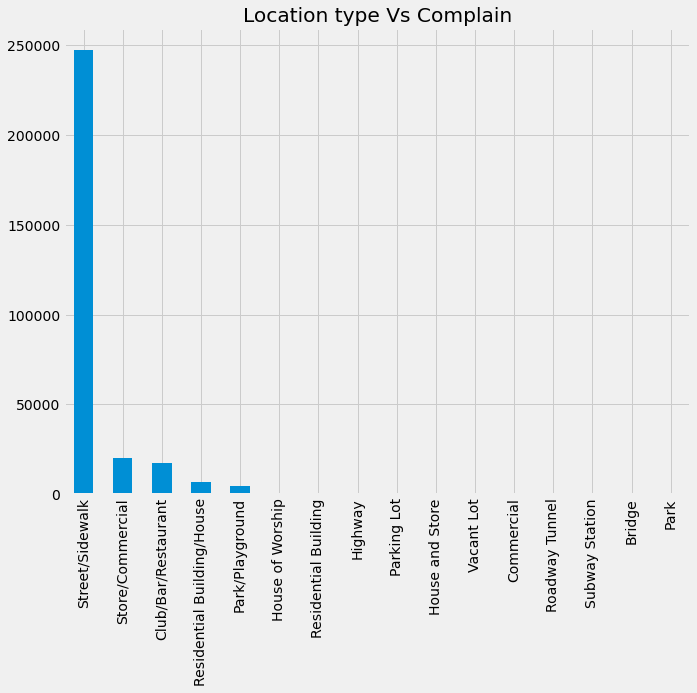

In [36]:
df_perfect['Location Type'].value_counts().plot(kind='bar',figsize=(10,8),title='Location type Vs Complain')


In [ ]:
Here we can see that the most of the complian are registered from the Street/Sidewalk


In [37]:
groupedby_complainttype= df_perfect.sort_values(['Request_Closing_Time']).groupby(['Location Type','Complaint Type'])['Request_Closing_Time'].mean()


In [38]:
dataFrameByLocationType = pd.DataFrame(groupedby_complainttype)


In [16]:
dataFrameByLocationType


Request_Closing_Time
Location Type       Complaint Type                           
Bridge              Homeless Encampment              3.819306
Club/Bar/Restaurant Drinking                         4.019785
                    Noise - Commercial               2.891485
                    Urinating in Public              4.491429
Commercial          Animal Abuse                     4.568575
...                                                       ...
Street/Sidewalk     Urinating in Public              3.209283
                    Vending                          3.791013
Subway Station      Animal Abuse                     3.035606
                    Urinating in Public              1.152130
Vacant Lot          Derelict Vehicle                 4.045354

[69 rows x 1 columns]

• Whether the average response time across complaint types is similar or not (overall)
• Are the type of complaint or service requested and location related?



In [39]:
df_complain_and_average = df_perfect.groupby('Complaint Type').Request_Closing_Time.mean()

In [40]:
df_complain_and_average = pd.DataFrame(df_complain_and_average)


In [41]:
average_response_time = df_perfect['Request_Closing_Time'].mean()

In [42]:
average_response_time

3.929396621862499

In [43]:
df_perfect.shape

(298534, 53)

In [44]:
sample_data = df_perfect.sample(n=2000)

In [45]:
Hnull = "Response time accross the complain type is not similar"
Halt = "Response time accross the complain type is similar"

In [46]:
from scipy.stats import ttest_1samp

In [49]:
ttest,pvalue = ttest_1samp(sample_data['Request_Closing_Time'],average_response_time)
ttest,pvalue

(0.4867187039236619, 0.6265110471153579)

In [48]:
if pvalue<0.005:
    print("Reject the null hypothesis i.e",end=' ')
    print(Halt)
else:
    print("Accept the null hypothesis i.e",end=' ')
    print(Hnull)
    

Accept the null hypothesis i.e Response time accross the complain type is not similar


In [28]:
#Are the type of complaint or service requested and location related

In [29]:
Hnull="there is no reltation betweent the Complain and Location"
Halt = "there is relation between the compalin and location"

In [30]:
datatable = pd.crosstab(df_perfect['Complaint Type'],df_perfect['Location Type'])

In [32]:
datatable.head()

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,
Animal Abuse,0,0,62,0,93,0,0,122,110,227,5081,0,521,1527,22,0
Animal in a Park,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,25,0,53,346,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,76773,0,0
Derelict Vehicle,0,0,0,13,0,0,0,0,0,0,0,5,0,17485,0,77


In [33]:
observed_values = datatable.values

In [34]:
from scipy import stats

In [35]:
val = stats.chi2_contingency(datatable)

In [36]:
pvalue = val[1]

In [37]:
alpha = 0.05

In [38]:
if pvalue<alpha:
    print("Reject the null Hypothesis i.e ",end=' ')
    print(Halt)
else:
    print("Accept the null Hypothesis i.e",end=' ')
    print(Hnull)

Reject the null Hypothesis i.e  there is relation between the compalin and location


Reject the null Hypothesis i.e 

there is relation between the compalin and location